In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import tensorflow as tf

print("TensorFlow Version:", tf.__version__)

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        print(f"GPU Name: {gpu.name}")
else:
    print("No GPU available")

TensorFlow Version: 2.15.0
No GPU available


In [ ]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/project/A_Z Handwritten Data.csv").astype('float32')

In [ ]:
# Load the dataset(for GPU Machine)
data = pd.read_csv("D:\Pritom\A_Z Handwritten Data.csv").astype('float32')

In [ ]:
#for laptop
data = pd.read_csv("D:\MCA\Demo Project\dataset\A_Z Handwritten Data.csv").astype('float32')

In [ ]:
# Split the data into features and labels
data.rename(columns={'0':'label'}, inplace=True)
X = data.drop('label', axis=1).values / 255  # Normalize pixel values
y = data['label'].values

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split


# Split the data into train and temporary test set
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

In [10]:
# Define input shape
# Reshape the input data
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
input_shape = X_train.shape[1:]

# Change the input shape to a larger size
input_shape = (28, 28, 1)
input_data = tf.keras.layers.Input(shape=input_shape)


In [ ]:
# Create LeNet-5 model
MobileNet_model = tf.keras.models.load_model("D:\MCA\Models\mobilenet.h5")
MobileNet_model.summary()

In [11]:
# Create LeNet-5 model(drive)
MobileNet_model = tf.keras.models.load_model("/content/drive/MyDrive/Models/mobilenet.h5")
MobileNet_model.summary()

Model: "MobileNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 batch_normalization_27 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_27 (Activation)  (None, 14, 14, 32)        0         
                                                                 
 depthwise_conv2d_13 (Depth  (None, 14, 14, 32)        320       
 wiseConv2D)                                                     
                                                                 
 batch_normalization_28 (Ba  (None, 14, 14, 32)        12

In [ ]:
# Create ResNet50-5 model
ResNet50_model = tf.keras.models.load_model("D:\MCA\Models\Resnet50.h5")
ResNet50_model.summary()

In [12]:
# Create ResNet50-5 model
ResNet50_model = tf.keras.models.load_model("/content/drive/MyDrive/Models/Resnet50.h5")
ResNet50_model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_13 (Conv2D)          (None, 26, 26, 32)           320       ['input_2[0][0]']             
                                                                                                  
 conv2d_14 (Conv2D)          (None, 24, 24, 64)           18496     ['conv2d_13[0][0]']           
                                                                                                  
 batch_normalization_12 (Ba  (None, 24, 24, 64)           256       ['conv2d_14[0][0]']           
 tchNormalization)                                                                         

In [ ]:
# Create ShuffleNet model
shufflenet_model = tf.keras.models.load_model("D:\MCA\Models\EfficientNet.h5")
shufflenet_model.summary()

In [13]:
# Create ShuffleNet model
shufflenet_model = tf.keras.models.load_model("/content/drive/MyDrive/Models/EfficientNet2.h5")
shufflenet_model.summary()

Model: "EfficientNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 14, 32)        288       
                                                                 
 batch_normalization_46 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_32 (Activation)  (None, 14, 14, 32)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 32)        1024      
                                                                 
 batch_normalization_47 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                    

In [ ]:
MobileNet_model.trainable = False

In [ ]:
# Input layers
MobileNet_input = Input(shape=input_shape, name='MobileNet_input')
shufflenet_input = Input(shape=input_shape, name='shufflenet_input')
ResNet50_input = Input(shape=input_shape, name='ResNet50_input')

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D
# Create MobileNet model
MobileNet_model = MobileNet_model(input_data)
MobileNet_model = Flatten()(MobileNet_model)
#MobileNet_model = GlobalAveragePooling2D()(MobileNet_model)
#MobileNet_model = Dense(units=1024, activation='relu')(MobileNet_model)

# Create ShuffleNet model
shufflenet_model = shufflenet_model(input_data)
shufflenet_model = Flatten()(shufflenet_model)
#shufflenet_model = GlobalAveragePooling2D()(shufflenet_model)
#shufflenet_model = Dense(units=1024, activation='relu')(shufflenet_model)

# Create ResNet50 model
ResNet50_model = ResNet50_model(input_data)
ResNet50_model = Flatten()(ResNet50_model)
#ResNet50_model = GlobalAveragePooling2D()(ResNet50_model)
#ResNet50_model = Dense(units=1024, activation='relu')(ResNet50_model)

In [15]:
from tensorflow.keras.layers import Concatenate, Dropout
# Concatenate outputs of all models
concatenated_outputs = Concatenate()([MobileNet_model, shufflenet_model, ResNet50_model])

In [16]:
# Add fully connected layers for classification
from keras.layers import Dense, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D, Dropout, BatchNormalization, Concatenate, Conv1D, Flatten
x = Dense(1024, activation='relu')(concatenated_outputs)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)  # Additional Dense layer
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
#x = Dense(128, activation='relu')(x)
#x = BatchNormalization()(x)
#x = Dropout(0.5)(x)
#x = Dense(64, activation='relu')(x)  # Additional Dense layer
#x = BatchNormalization()(x)
#x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)
outputs=output



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 MobileNet (Functional)      (None, 26)                   4315482   ['input_1[0][0]']             
                                                                                                  
 EfficientNet (Functional)   (None, 26)                   660522    ['input_1[0][0]']             
                                                                                                  
 ResNet50 (Functional)       (None, 26)                   4937114   ['input_1[0][0]']             
                                                                                              

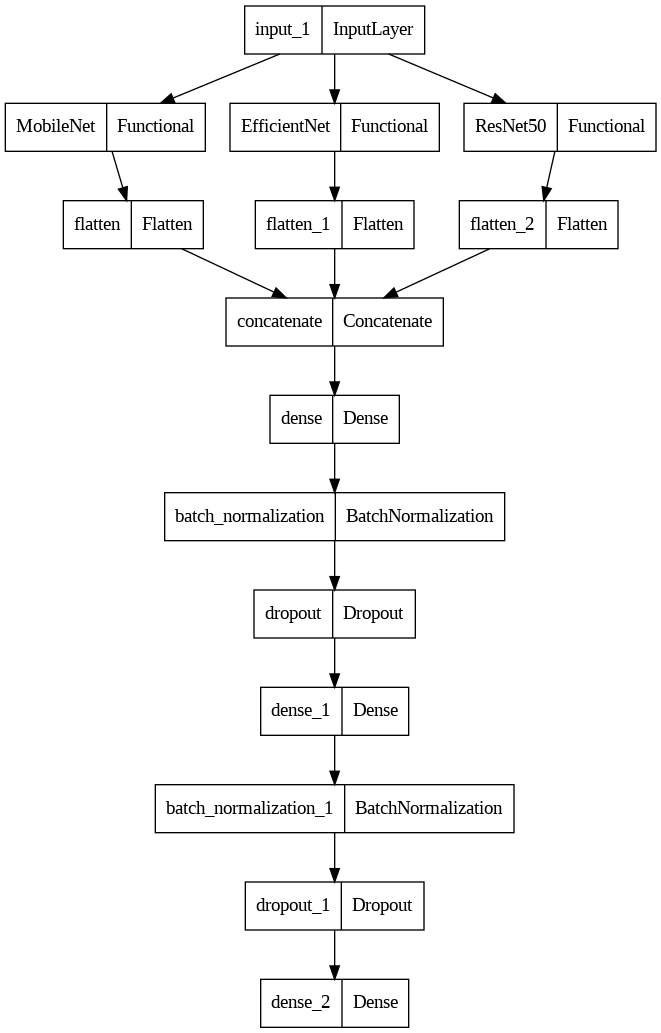

In [17]:
# Define the hybrid model
from tensorflow.keras.utils import plot_model
hybrid_model = Model(inputs=[input_data], outputs=output)
hybrid_model.summary()
plot_model(hybrid_model, show_shapes=None)  # Plot the model architecture

In [ ]:
# Compile the model
from keras.optimizers import Adam
hybrid_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Check the shape of X_train
print(X_train.shape)

# Check the data type of X_train
print(X_train.dtype)

# Check the data type of y_train
print(y_train.dtype)
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

(297960, 784, 1)
float32
int64


In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force TensorFlow to use CPU only

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [ ]:
import os
gpus = '-1'
import tensorflow as tf


In [ ]:
# Train the model
# 1. Adjust the output layer
num_classes = 26  # Change the number of classes to match your data

# 2. Correct data preprocessing
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

# 3. Train the model
epochs = 10
batch_size = 128

history = hybrid_model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/10
2328/2328 [==============================] - 311s 134ms/step - loss: 0.0135 - accuracy: 0.9982 - val_loss: 0.0454 - val_accuracy: 0.9953
Epoch 2/10
2328/2328 [==============================] - 308s 132ms/step - loss: 0.0118 - accuracy: 0.9985 - val_loss: 0.0388 - val_accuracy: 0.9962
Epoch 3/10
2328/2328 [==============================] - 308s 132ms/step - loss: 0.0116 - accuracy: 0.9984 - val_loss: 0.0433 - val_accuracy: 0.9961
Epoch 4/10
2328/2328 [==============================] - 309s 133ms/step - loss: 0.0113 - accuracy: 0.9984 - val_loss: 0.0380 - val_accuracy: 0.9966
Epoch 5/10
2328/2328 [==============================] - 311s 134ms/step - loss: 0.0122 - accuracy: 0.9984 - val_loss: 0.0430 - val_accuracy: 0.9958
Epoch 6/10
2328/2328 [==============================] - 307s 132ms/step - loss: 0.0117 - accuracy: 0.9986 - val_loss: 0.0404 - val_accuracy: 0.9962
Epoch 7/10
2328/2328 [==============================] - 308s 132ms/step - loss: 0.0097 - accuracy: 0.9987 - val_

In [ ]:
# Evaluate the hybrid model on the test data
test_loss, test_acc = hybrid_model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print(f"Test accuracy: {test_acc:.4f}")

1164/1164 [==============================] - 18s 15ms/step - loss: 0.0349 - accuracy: 0.9969
Test accuracy: 0.9969


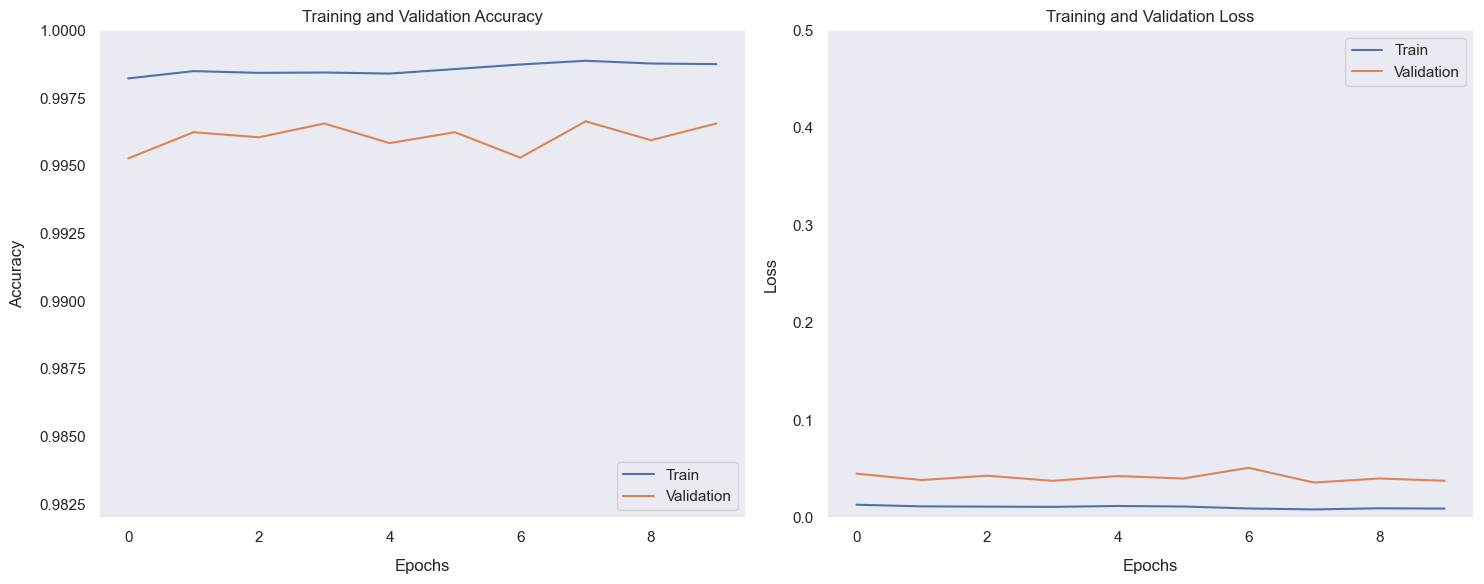

In [ ]:
import matplotlib.pyplot as plt

# Assume `history` is already defined and contains the training history data

# Create a figure with two subplots, side by side
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Training and Validation Loss on the first subplot
ax1.plot(history.history['loss'], label='Training loss')
ax1.plot(history.history['val_loss'], label='Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs', labelpad=10, fontsize=12, horizontalalignment='center')
ax1.set_ylabel('Loss', labelpad=10, fontsize=12, horizontalalignment='center')
ax1.set_ylim(0, 0.5)
ax1.legend(['Train', 'Validation'], loc='upper right')
ax1.grid()

# Plot Training and Validation Accuracy on the second subplot
ax2.plot(history.history['accuracy'], label='Training accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs', labelpad=10, fontsize=12, horizontalalignment='center')
ax2.set_ylabel('Accuracy', labelpad=10, fontsize=12, horizontalalignment='center')
ax2.set_ylim(0.982, 1)
ax2.legend(['Train', 'Validation'], loc='lower right')
ax2.grid()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

1164/1164 [==============================] - 17s 13ms/step


<Axes: >

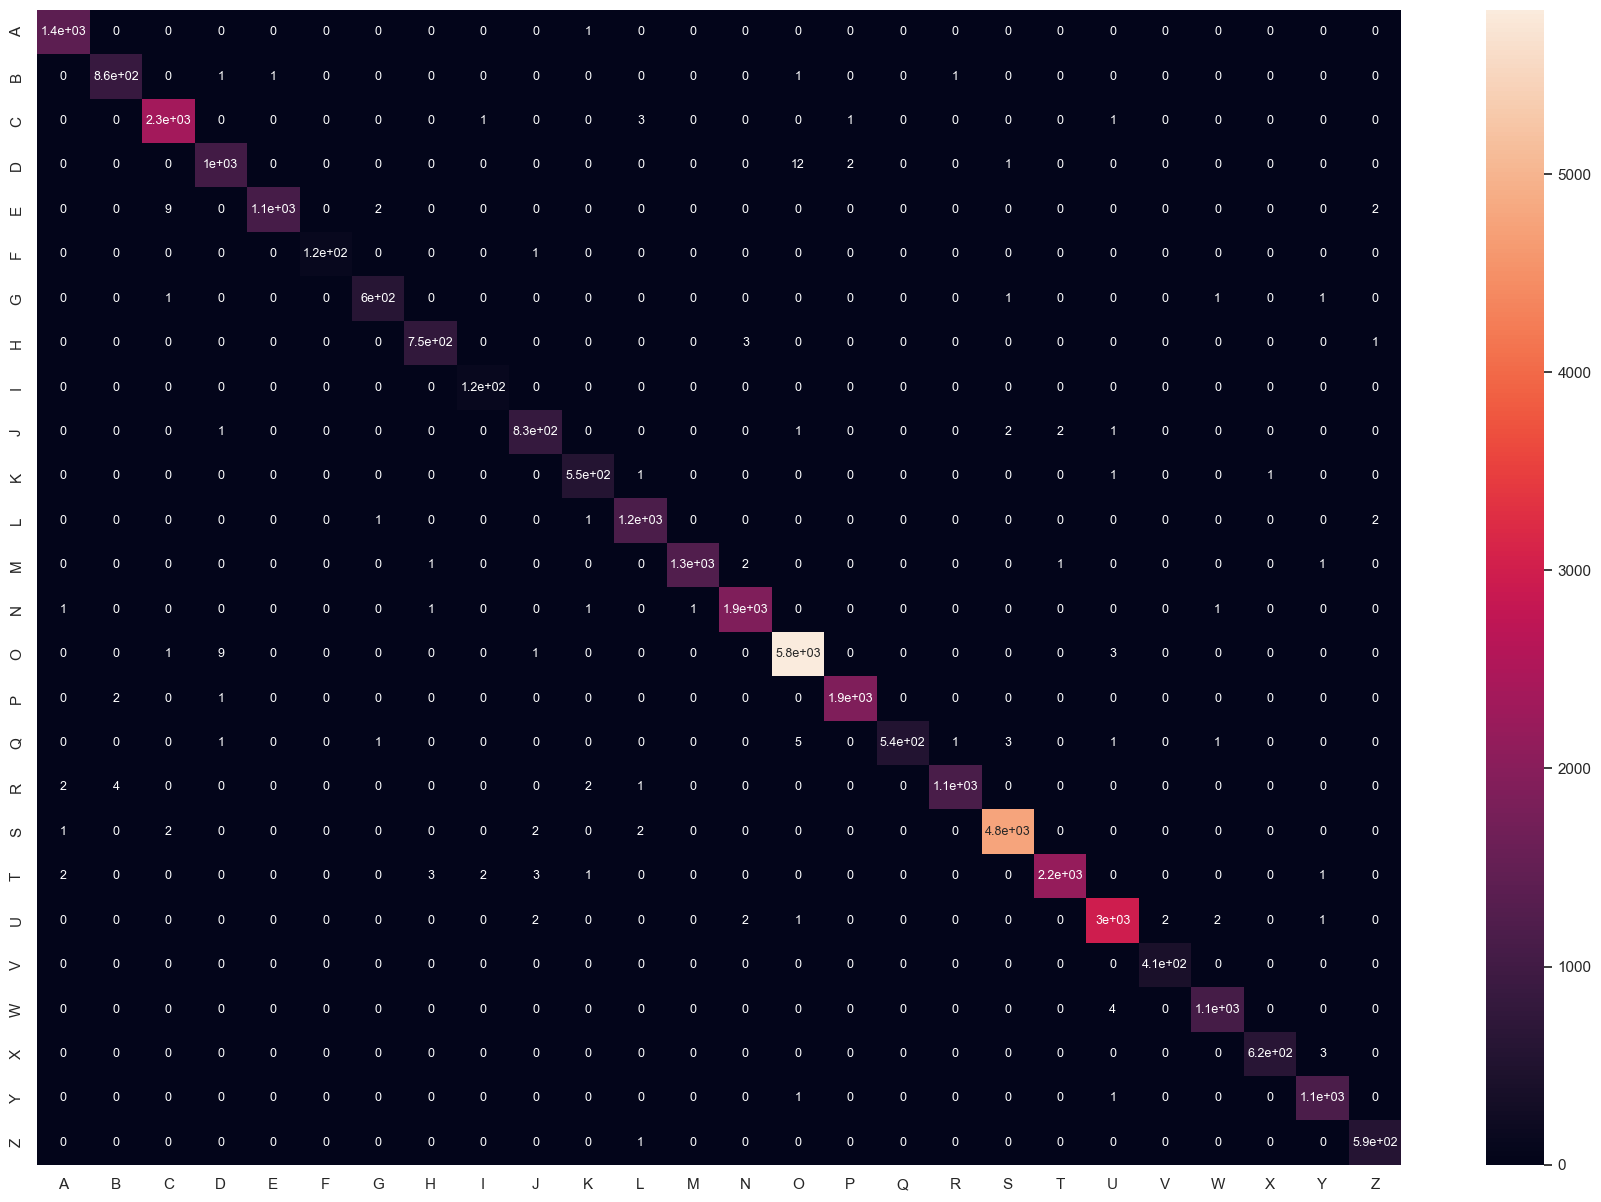

In [ ]:
# Import the ConfusionMatrixDisplay function from sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Create the confusion matrix
y_pred = hybrid_model.predict(X_test.reshape(-1, 28, 28, 1))
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
labels = [chr(i) for i in range(ord('A'), ord('Z') + 1)]
df_cm = pd.DataFrame(cm, labels,labels)
plt.figure(figsize = (22,15))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 9})# font size

In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model, test_generator):
    # Make predictions on the test set
    y_pred = hybrid_model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)

    # Get true labels
    true_labels = y_test

    # Display the classification report
    report = classification_report(true_labels, y_pred)
    print("Classification Report:\n", report)

# Example usage
generate_classification_report(hybrid_model, [X_test,X_test])

1164/1164 [==============================] - 15s 13ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1411
           1       0.99      1.00      0.99       864
           2       0.99      1.00      1.00      2355
           3       0.99      0.99      0.99      1030
           4       1.00      0.99      0.99      1102
           5       1.00      0.99      1.00       116
           6       0.99      0.99      0.99       599
           7       0.99      0.99      0.99       757
           8       0.98      1.00      0.99       120
           9       0.99      0.99      0.99       833
          10       0.99      0.99      0.99       553
          11       0.99      1.00      0.99      1162
          12       1.00      1.00      1.00      1256
          13       1.00      1.00      1.00      1877
          14       1.00      1.00      1.00      5842
          15       1.00      1.00      1.00      189